<a href="https://colab.research.google.com/github/Pdeep666/POWERBI/blob/main/MINST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Classify an input to be 0 - 9

In [ ]:
import numpy as np
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

In [ ]:
# prompt: download Mnist dataset using tensorflow

import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()


In [ ]:
print(np.shape(x_train)) #
print(np.shape(y_train)) #

print(np.shape(x_test))
print(np.shape(y_test))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# prompt: split the training data into training and validation data

x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

print(np.shape(x_train)) #
print(np.shape(y_train)) #

print(np.shape(x_val))
print(np.shape(y_val))


(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
 y_train[0]

5

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

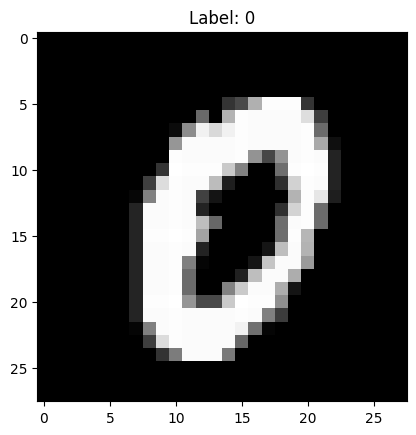

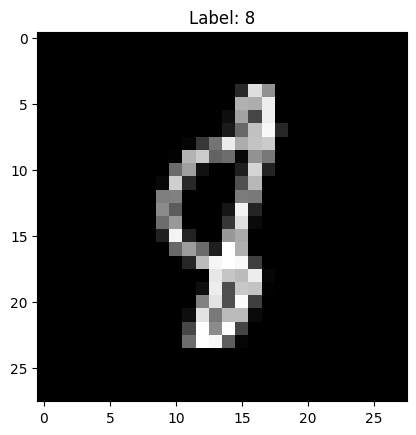

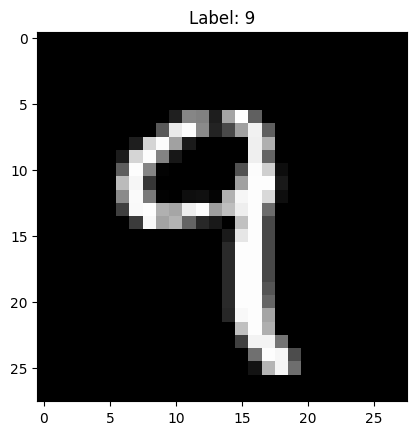

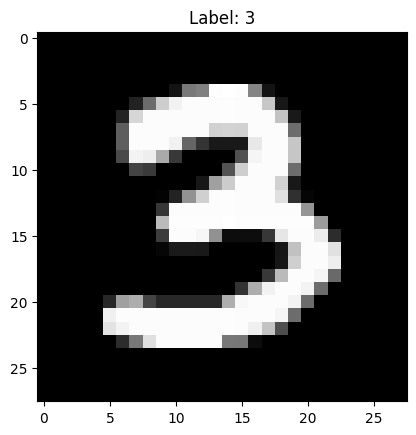

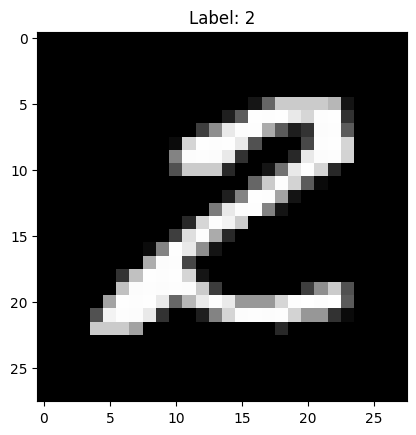

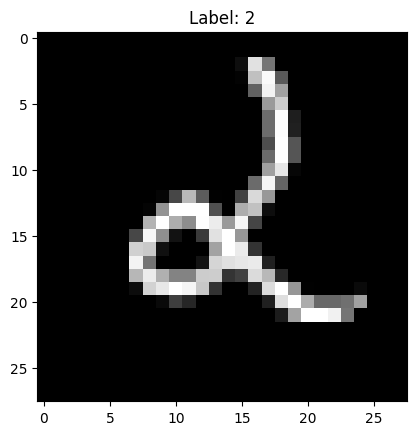

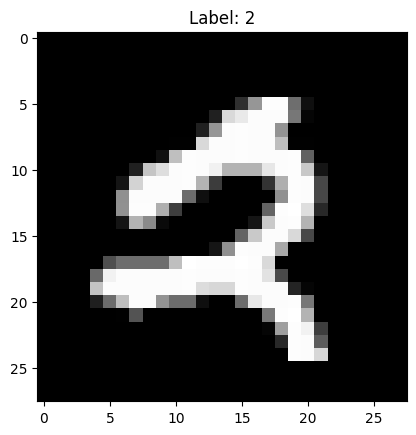

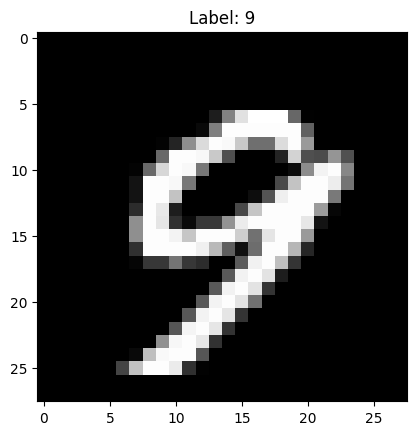

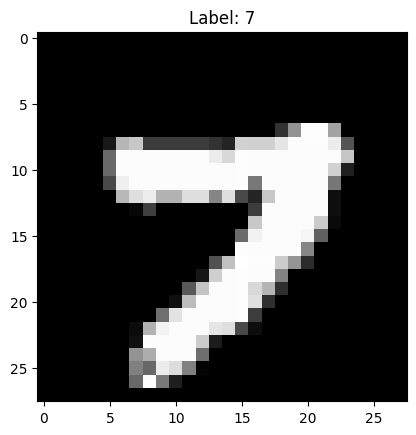

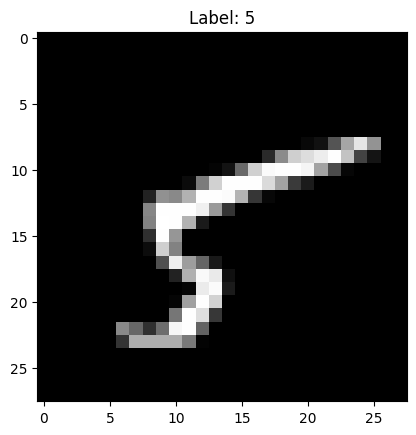

In [ ]:
# prompt: display some examples from the dataset

import matplotlib.pyplot as plt

# Choose a random sample of 10 images from the training set
sample_indices = np.random.randint(low=0, high=len(x_train), size=10)

# Display the images and their corresponding labels
for i in sample_indices:
  plt.imshow(x_train[i], cmap="gray")
  plt.title(f"Label: {y_train[i]}")
  plt.show()


In [ ]:
# prompt: Give me a convolutional neural network to classify the 10 classes, the input size is 28 by 28

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),# (B, 28, 28, 1)
  tf.keras.layers.MaxPooling2D((2, 2)),
  Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

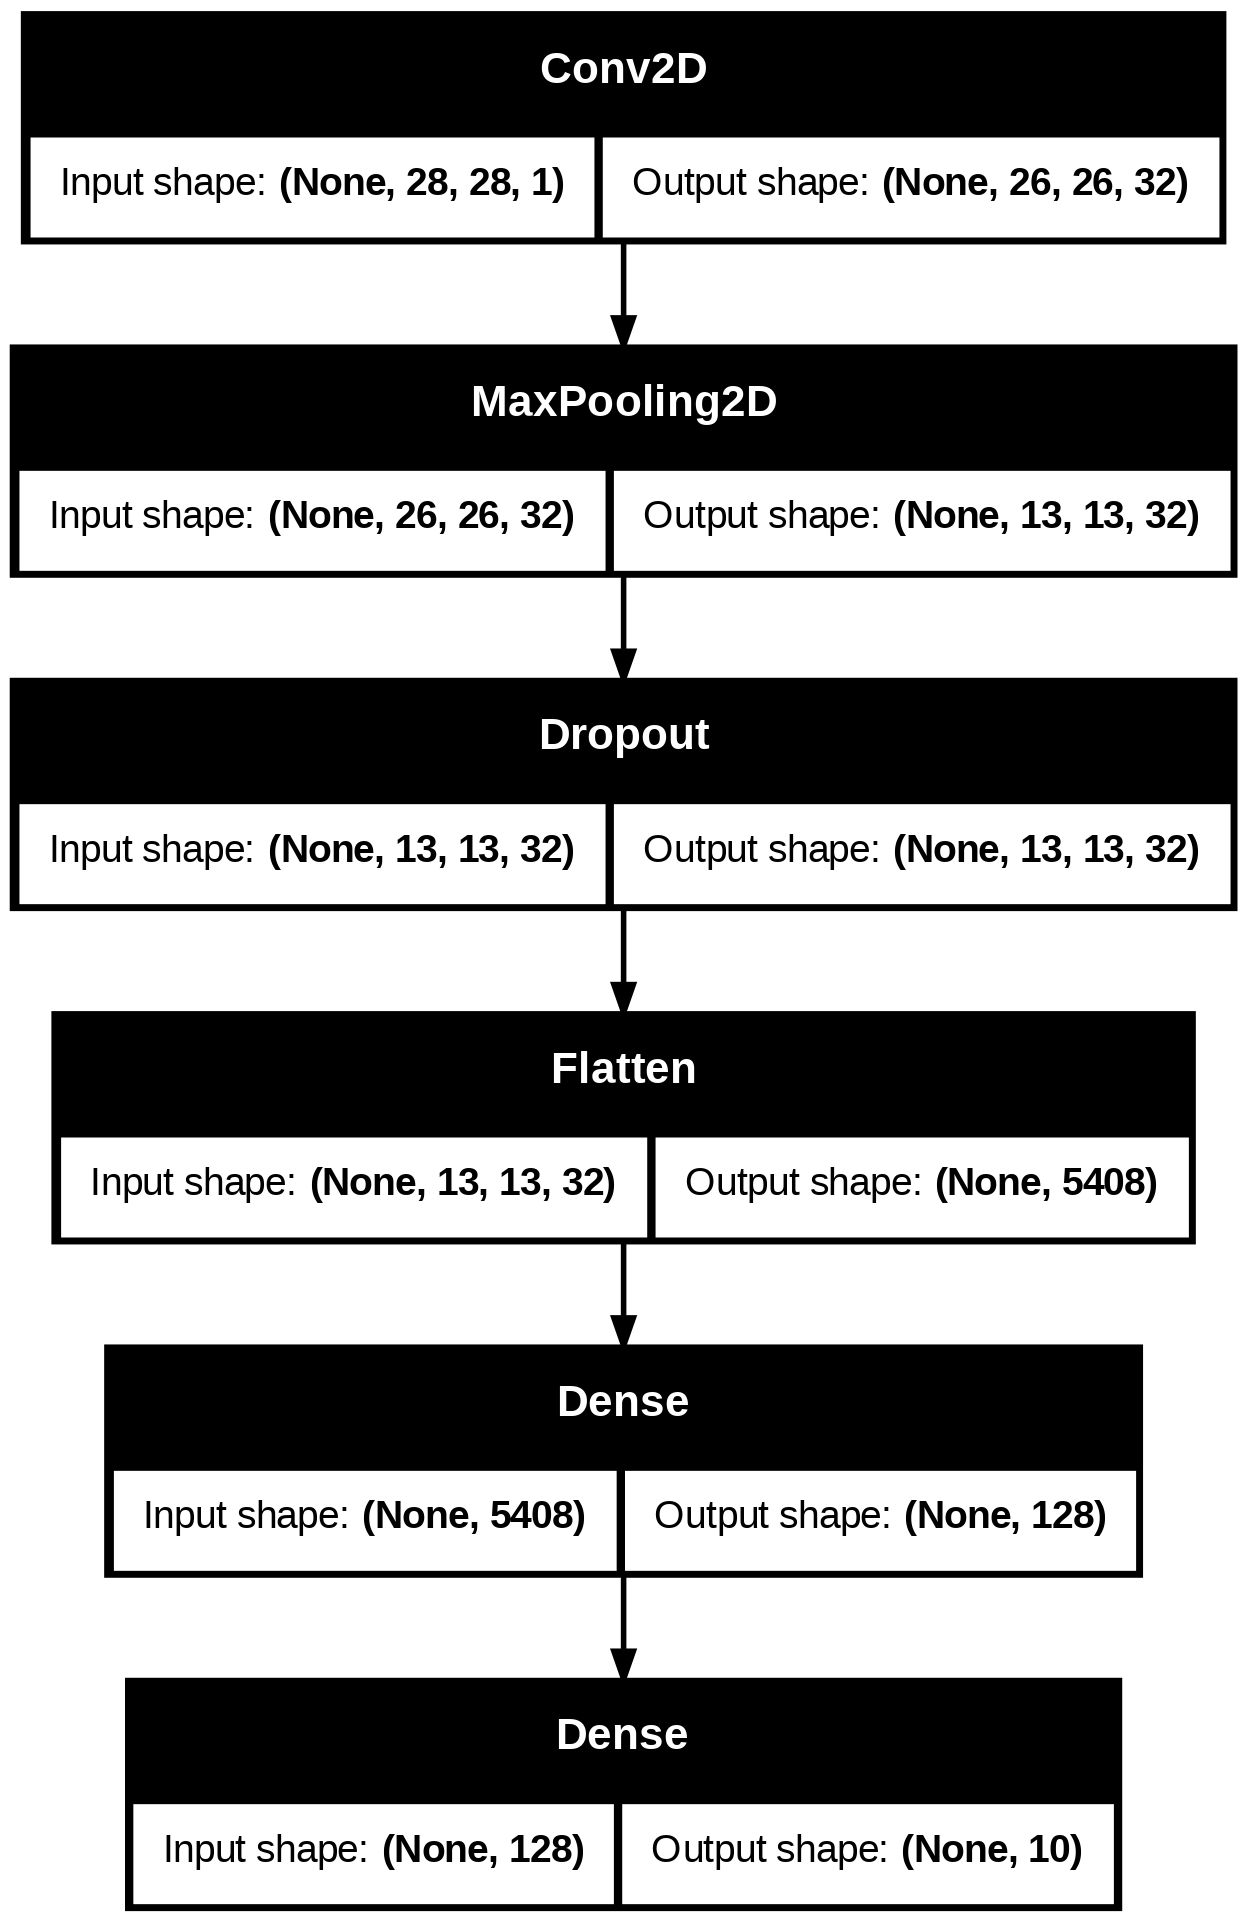

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)


In [ ]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




In [ ]:
# prompt: Train the model. While training include validation data as well

history = model.fit(x_train, y_train, epochs=10, batch_size = 128, validation_data=(x_val, y_val))
# w = w - alpha d J(w)/d w

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3404 - loss: 4.7335 - val_accuracy: 0.9462 - val_loss: 0.1899
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9356 - loss: 0.2093 - val_accuracy: 0.9568 - val_loss: 0.1462
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9568 - loss: 0.1416 - val_accuracy: 0.9647 - val_loss: 0.1172
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9639 - loss: 0.1164 - val_accuracy: 0.9716 - val_loss: 0.1031
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9702 - loss: 0.0961 - val_accuracy: 0.9698 - val_loss: 0.1056
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9744 - loss: 0.0817 - val_accuracy: 0.9742 - val_loss: 0.0963
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9736 - loss: 0.0819 - val_accuracy: 0.9713 - val_loss: 0.1012
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9767 - loss: 0.0724 - val_accuracy: 0.

In [ ]:
# prompt: in the above training process, incorporate early stopping by monitoring validation loss

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), callbacks=[early_stopping])


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9824 - loss: 0.0523 - val_accuracy: 0.9743 - val_loss: 0.0985
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9829 - loss: 0.0522 - val_accuracy: 0.9757 - val_loss: 0.0959
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9844 - loss: 0.0476 - val_accuracy: 0.9752 - val_loss: 0.0932
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9844 - loss: 0.0486 - val_accuracy: 0.9783 - val_loss: 0.0857
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9853 - loss: 0.0433 - val_accuracy: 0.9759 - val_loss: 0.0916
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0383 - val_accuracy: 0.9762 - val_loss: 0.1012
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9856 - loss: 0.0413 - val_accuracy: 0.9766 - val_loss: 0.0911
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9869 - loss: 0.0371 - val_accuracy: 0.

In [ ]:

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0989
Test accuracy: 0.9775000214576721


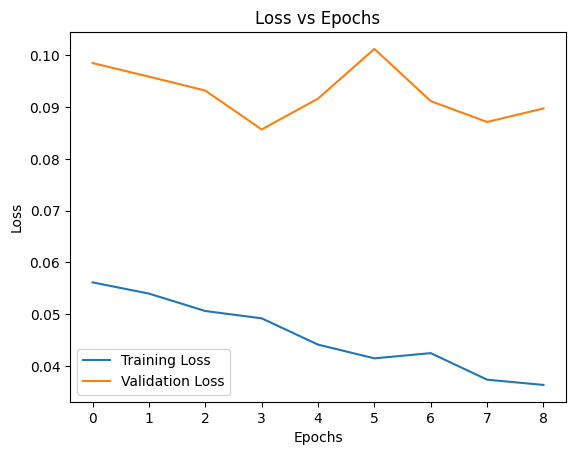

In [ ]:
# prompt: in the above figure, include legends

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


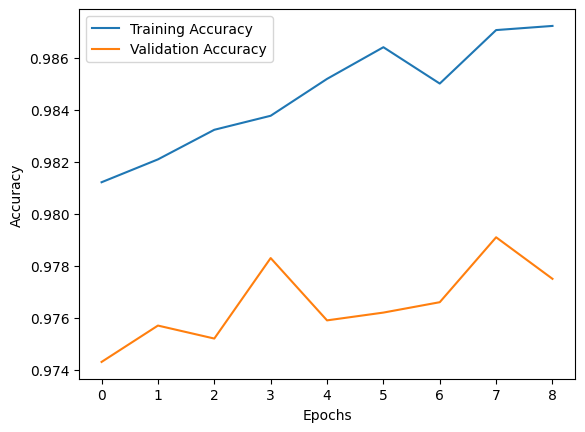

In [ ]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
class_output = model.predict(x_test[0].reshape(1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


In [ ]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
print(class_output)

[[4.3328923e-09 2.0364196e-11 5.3493113e-07 2.3673301e-06 5.9998772e-14
  7.7644856e-08 3.9701992e-12 9.9999619e-01 3.1691778e-09 8.7264044e-07]]


In [ ]:
# prompt: output the argmax of class_output

print(np.argmax(class_output))


7


In [ ]:
model1 = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),


    Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,964 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

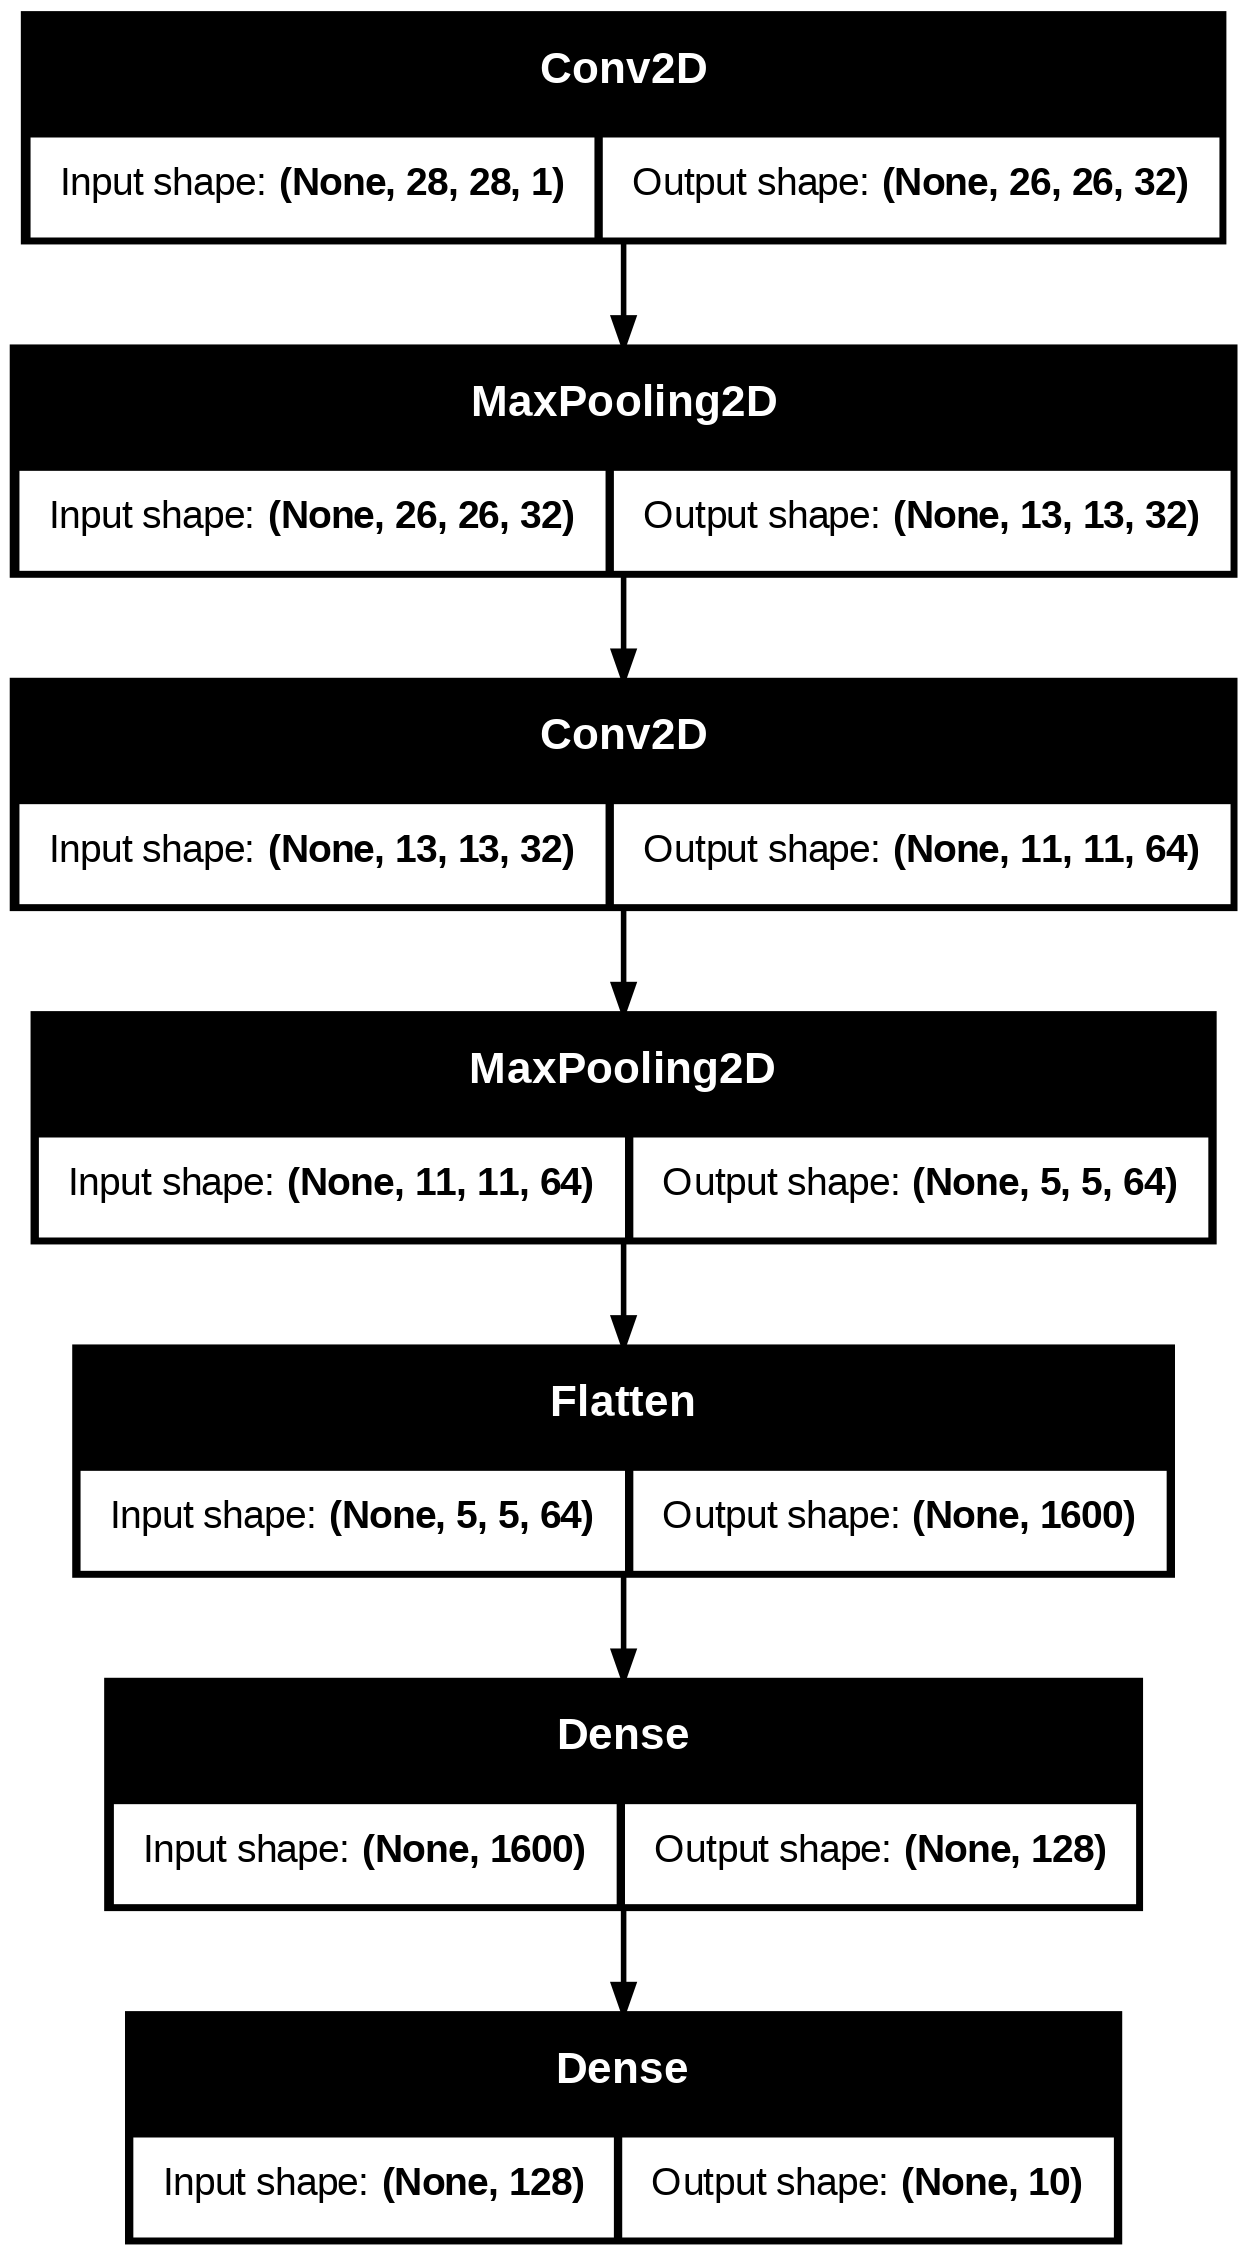

In [ ]:
tf.keras.utils.plot_model(model1, show_shapes=True)



In [ ]:
model1.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# prompt: Train the model. While training include validation data as well

history = model1.fit(x_train, y_train, epochs=10, batch_size = 128, validation_data=(x_val, y_val))
# w = w - alpha d J(w)/d w

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5956 - loss: 13.5260 - val_accuracy: 0.9310 - val_loss: 0.2339
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9273 - loss: 0.2344 - val_accuracy: 0.9480 - val_loss: 0.1789
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9467 - loss: 0.1712 - val_accuracy: 0.9603 - val_loss: 0.1370
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9563 - loss: 0.1372 - val_accuracy: 0.9633 - val_loss: 0.1318
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9625 - loss: 0.1177 - val_accuracy: 0.9672 - val_loss: 0.1105
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9706 - loss: 0.0967 - val_accuracy: 0.9709 - val_loss: 0.1033
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9710 - loss: 0.0938 - val_accuracy: 0.9709 - val_loss: 0.1028
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9750 - loss: 0.0798 - val_accuracy: 0

In [ ]:
# prompt: in the above training process, incorporate early stopping by monitoring validation loss

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model1.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), callbacks=[early_stopping])


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9802 - loss: 0.0602 - val_accuracy: 0.9730 - val_loss: 0.0967
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9818 - loss: 0.0560 - val_accuracy: 0.9750 - val_loss: 0.0892
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9847 - loss: 0.0489 - val_accuracy: 0.9736 - val_loss: 0.0954
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0471 - val_accuracy: 0.9755 - val_loss: 0.0876
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9855 - loss: 0.0454 - val_accuracy: 0.9732 - val_loss: 0.0973
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0387 - val_accuracy: 0.9745 - val_loss: 0.0952
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9878 - loss: 0.0390 - val_accuracy: 0.9723 - val_loss: 0.1035
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9889 - loss: 0.0345 - val_accuracy: 0.

In [ ]:

test_loss, test_acc = model1.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.1062
Test accuracy: 0.9768999814987183


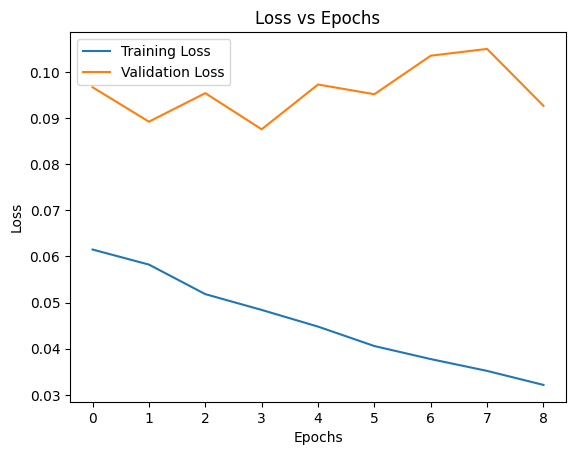

In [ ]:
# prompt: in the above figure, include legends

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()  #Both Training and Validation Loss Decreasing:

#This is a good scenario indicating that the model is learning and generalizing well. The model is performing well on both the training and validation datasets.


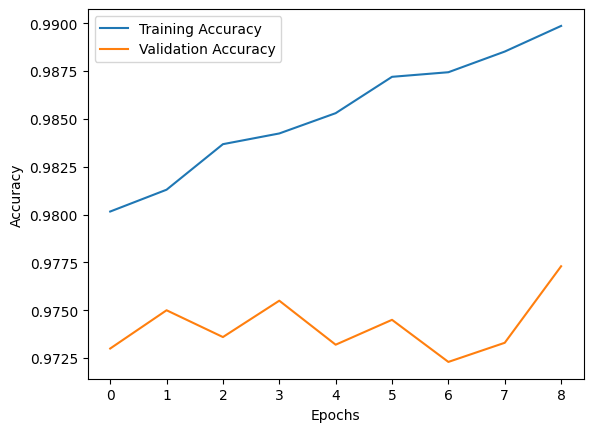

In [ ]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()      #Both Training and Validation Accuracy Increasing:


In [ ]:
model2 = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),

    # Add another Conv2D layer
    Conv2D(filters=128, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten the output from the convolutional layers
    tf.keras.layers.Flatten(),

    # Add Dropout layer
    tf.keras.layers.Dropout(0.5),  # 50% dropout

    # Fully connected layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

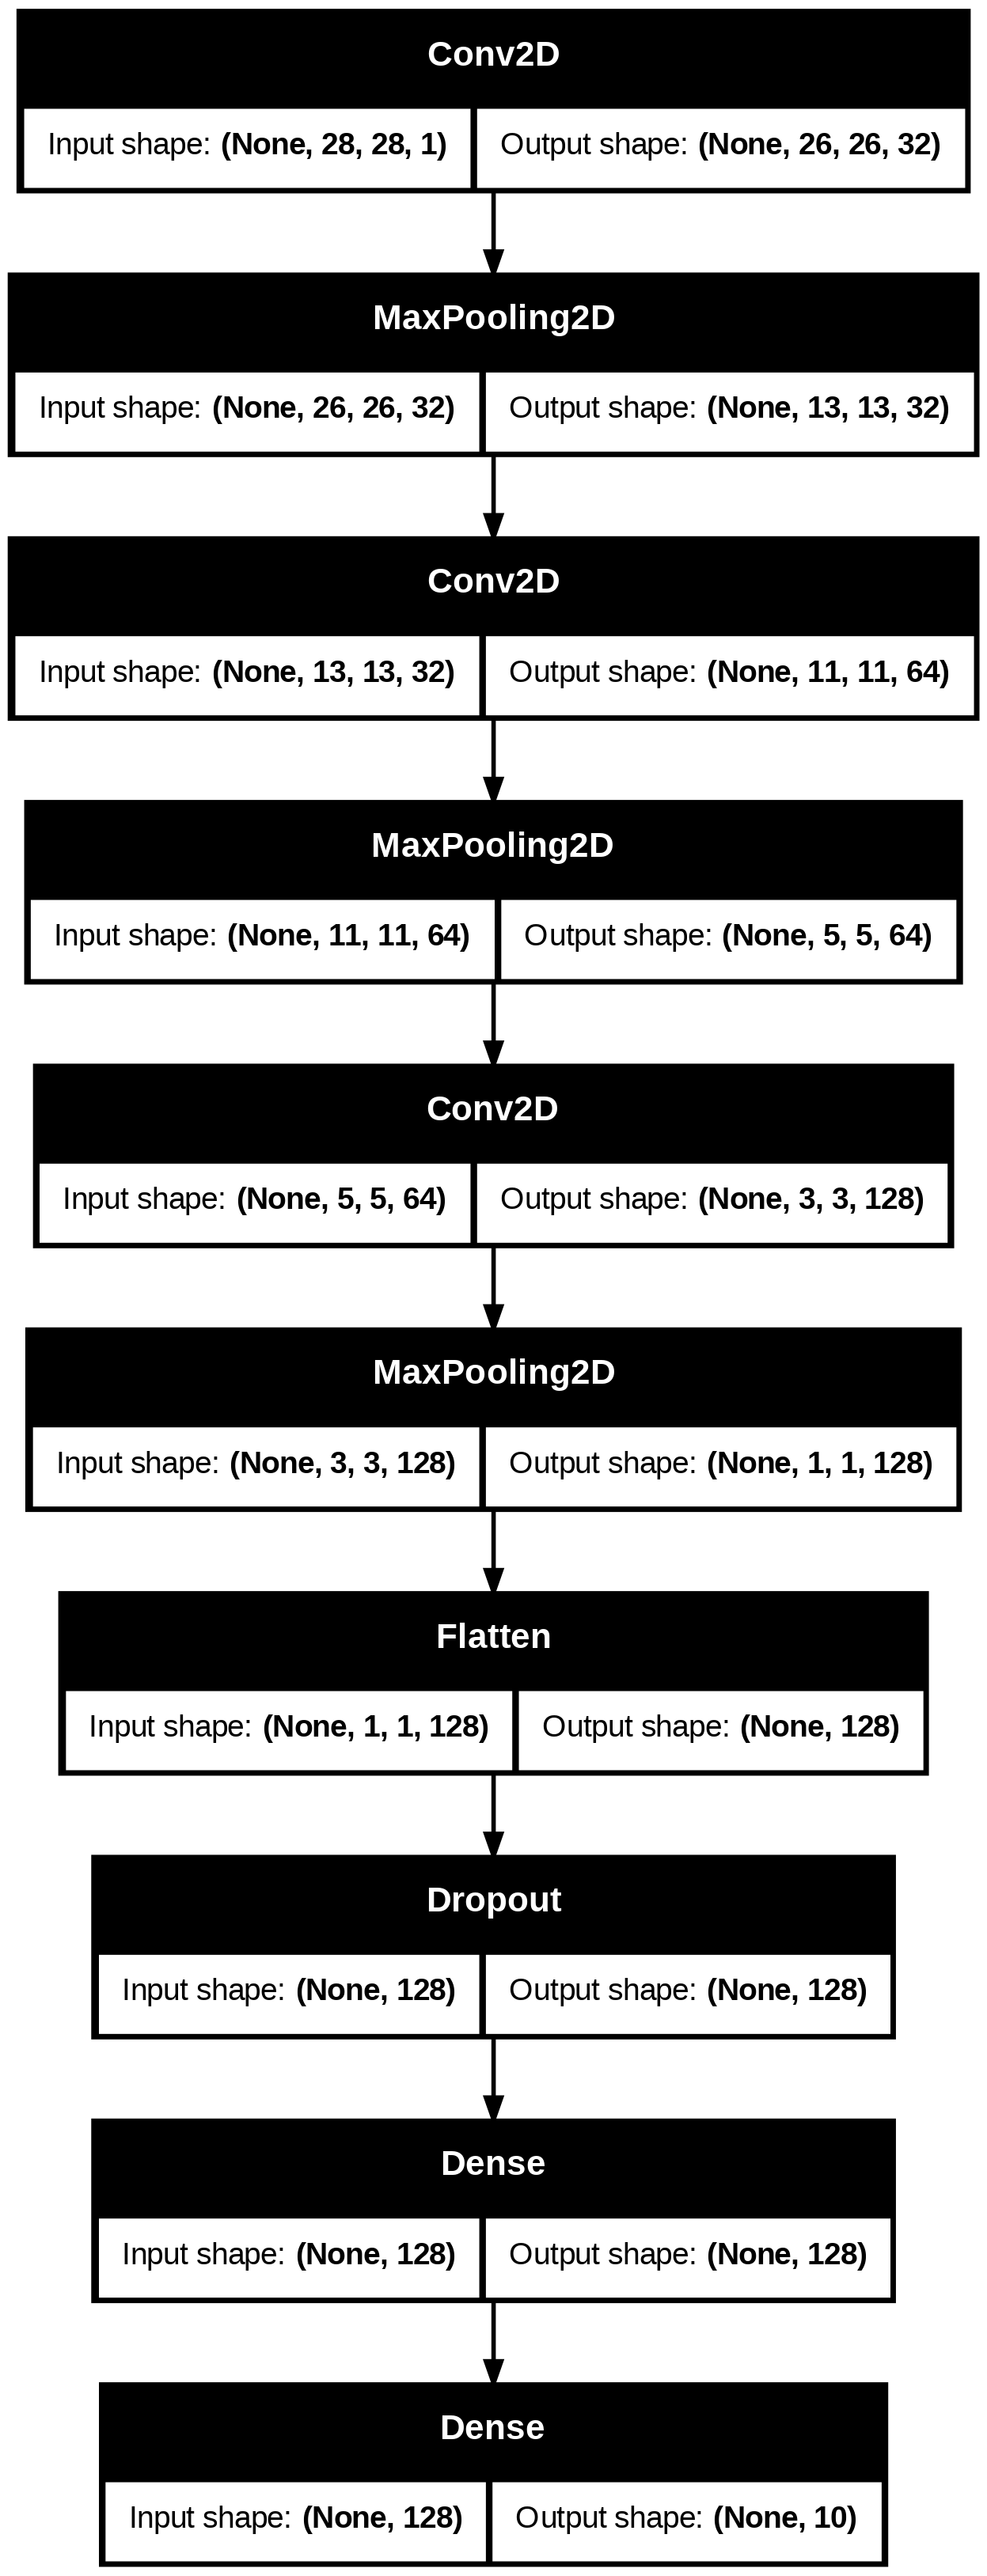

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
model2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

history = model2.fit(x_train, y_train, epochs=10, batch_size = 128, validation_data=(x_val, y_val))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4283 - loss: 2.4329 - val_accuracy: 0.9297 - val_loss: 0.2505
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8715 - loss: 0.4170 - val_accuracy: 0.9572 - val_loss: 0.1412
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9097 - loss: 0.2962 - val_accuracy: 0.9617 - val_loss: 0.1273
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9291 - loss: 0.2372 - val_accuracy: 0.9699 - val_loss: 0.1007
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9404 - loss: 0.2046 - val_accuracy: 0.9708 - val_loss: 0.0995
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9467 - loss: 0.1772 - val_accuracy: 0.9728 - val_loss: 0.0968
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9487 - loss: 0.1685 - val_accuracy: 0.9772 - val_loss: 0.0836
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9547 - loss: 0.1475 - val_accuracy: 0.

In [ ]:
# prompt: in the above training process, incorporate early stopping by monitoring validation loss

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model2.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), callbacks=[early_stopping])


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9618 - loss: 0.1205 - val_accuracy: 0.9808 - val_loss: 0.0749
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9655 - loss: 0.1143 - val_accuracy: 0.9820 - val_loss: 0.0711
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9662 - loss: 0.1116 - val_accuracy: 0.9815 - val_loss: 0.0676
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9657 - loss: 0.1093 - val_accuracy: 0.9833 - val_loss: 0.0696
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9692 - loss: 0.1005 - val_accuracy: 0.9822 - val_loss: 0.0680
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9710 - loss: 0.0940 - val_accuracy: 0.9820 - val_loss: 0.0701
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9696 - loss: 0.0982 - val_accuracy: 0.9818 - val_loss: 0.0673
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9728 - loss: 0.0911 - val_accuracy: 0.

In [ ]:
test_loss, test_acc = model2.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9779 - loss: 0.0787
Test accuracy: 0.982200026512146


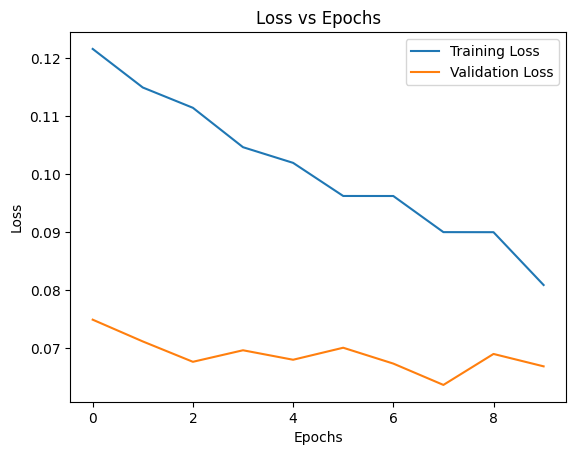

In [ ]:
# prompt: in the above figure, include legends

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()  #Both Training and Validation Loss Decreasing:

#This is a good scenario indicating that the model is learning and generalizing well. The model is performing well on both the training and validation datasets.


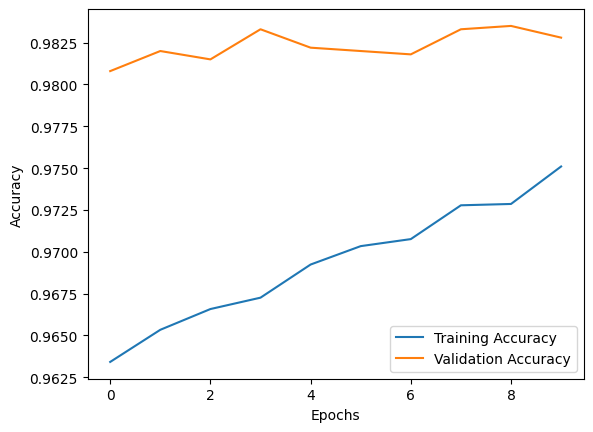

In [ ]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()      #Both Training and Validation Accuracy Increasing:


**VGG19**
VGG19 is a 19-layer deep neural network, consisting of 16 convolutional layers and 3 fully connected layers.
It uses small 3x3 filters in all convolutional layers with a stride of 1 and padding to preserve the spatial resolution after convolution.
After every few convolutional layers, it applies max-pooling with a 2x2 window, which helps reduce the spatial dimensions.

In [ ]:
from keras.applications import VGG19

In [ ]:
(X_mnist, y_mnist), (X_mnist_test, y_mnist_test) = mnist.load_data()

In [ ]:
print('MNIST dataset (original)')
print(f'Train: X={X_mnist.shape}, y={y_mnist.shape}')
print(f'Test: X={X_mnist_test.shape}, y={y_mnist_test.shape}')

MNIST dataset (original)
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [ ]:
X_mnist = X_mnist.reshape((X_mnist.shape + (1,)))
X_mnist_test = X_mnist_test.reshape((X_mnist_test.shape + (1,)))

print(f'X: train={X_mnist.shape}, test={X_mnist_test.shape}')

X: train=(60000, 28, 28, 1), test=(10000, 28, 28, 1)


In [ ]:
X_mnist = X_mnist.astype('float32')
X_mnist_test = X_mnist_test.astype('float32')

X_mnist = X_mnist / 255
X_mnist_test = X_mnist_test / 255

X_mnist[0].min(), X_mnist[0].max()

(0.0, 1.0)

In [ ]:
# Resizing images from 28x28 to 64x64 (returns EagerTensor type)
img_height = 64
img_width = 64
X_mnist = tf.image.resize_with_pad(
    image=X_mnist,
    target_height=img_height,
    target_width=img_width,
    method='nearest',
)
X_mnist_test = tf.image.resize_with_pad(
    image=X_mnist_test,
    target_height=img_height,
    target_width=img_width,
    method='nearest',
)

# Convert EagerTensor to numpy array
X_mnist = X_mnist.numpy()
X_mnist_test = X_mnist_test.numpy()

In [ ]:
print('MNIST dataset (transformed)')
print(f'Train: X={X_mnist.shape}, y={y_mnist.shape}')
print(f'Test: X={X_mnist_test.shape}, y={y_mnist_test.shape}')

MNIST dataset (transformed)
Train: X=(60000, 64, 64, 1), y=(60000,)
Test: X=(10000, 64, 64, 1), y=(10000,)


In [ ]:
def plot_digit(image, value, plt, i):
    plt.subplot(4, 4, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Value: {value}")
    plt.xticks([])
    plt.yticks([])

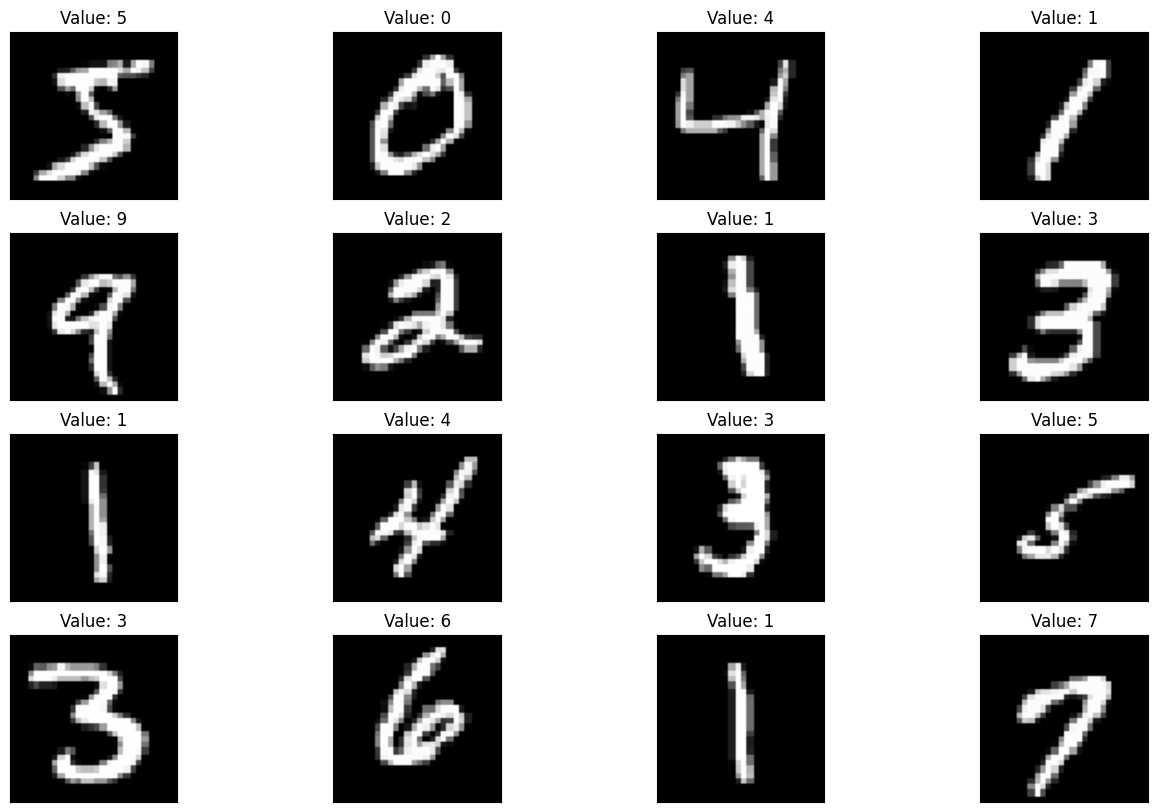

In [ ]:
# After resizing (with size 64x64)
plt.figure(figsize=(16, 10))
for i in range(16):
    plot_digit(X_mnist[i], y_mnist[i], plt, i)

plt.show()

In [ ]:
num_of_classes = len(np.unique(y_mnist))
num_of_classes

10

In [ ]:
input_shape_mnist = X_mnist.shape[1:]
input_shape_mnist

(64, 64, 1)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import keras.backend as K

def get_vgg19_model():
    return keras.Sequential([
        # Convolutional base for feature extraction
        # Block One
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape_mnist),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='valid'),

        # Block Two
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='valid'),

        # Block Three
        layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='valid'),

        # Block Four
        layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='valid'),

        # Block Five
        layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='valid'),

        # Head of dense (fully connected) layers for classification
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(num_of_classes, activation='softmax'),
    ])